In [44]:
# Dependencies and Setup
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
from geopy.geocoders import Nominatim
import scipy.stats as st

In [45]:
csv = os.path.join("Resources/Life_expectancy_data_Proj_1.csv")
GDP = os.path.join("Resources/GDPbillions.csv")

In [46]:
df = pd.read_csv(csv)

In [47]:
df.dropna(how='any')
df.dtypes

Country     object
Year       float64
Female     float64
Male       float64
Total      float64
dtype: object

In [48]:
df.head()

,Country,Year,Female,Male,Total
0,Australia,1921.0,63.18,59.10,60.97
1,Australia,1922.0,65.11,60.88,62.83
2,Australia,1923.0,63.66,59.98,61.68
3,Australia,1924.0,64.51,60.77,62.48
4,Australia,1925.0,65.38,61.30,63.17


In [49]:
df.count()

Country    414
Year       411
Female     411
Male       411
Total      411
dtype: int64

In [50]:
life_df1 = df.loc[df["Year"] > 2007, ["Country", "Year", "Female", "Male", "Total"]]

In [51]:
life_df2 = life_df1.loc[life_df1["Year"] < 2019, ["Country", "Year", "Female", "Male", "Total"]]

In [53]:
life_df2.head()

,Country,Year,Female,Male,Total
87,Australia,2008.0,83.70,79.14,81.43
88,Australia,2009.0,84.00,79.44,81.73
89,Australia,2010.0,84.20,79.81,82.02
90,Australia,2011.0,84.25,79.92,82.09
91,Australia,2012.0,84.30,80.27,82.30


In [54]:
# Use the code provided to separate the data by year
Aus = life_df2[(life_df2["Country"] == 'Australia')]
Chil = life_df2[(life_df2["Country"] == 'Chile')]
HngKng = life_df2[(life_df2["Country"] == 'Hong Kong')]
Hun = life_df2[(life_df2["Country"] == 'Hungary')]
USA = life_df2[(life_df2["Country"] == 'United States')]


#Group by "Country" and take the mean of each of life expectancy disregarding gender.
mean_life_01 = Aus.groupby(["Year"]).mean()["Total"]
mean_life_02 = Chil.groupby(["Year"]).mean()["Total"]
mean_life_03 = HngKng.groupby(["Year"]).mean()["Total"]
mean_life_04 = Hun.groupby(["Year"]).mean()["Total"]
mean_life_05 = USA.groupby(["Year"]).mean()["Total"]


#Data frame of life expectancy by country
life_ex_country_df = pd.DataFrame({"Australia": mean_life_01,
    "Chile": mean_life_02,
    "Hong Kong": mean_life_03,
    "Hungary": mean_life_04,
    "United States": mean_life_05                               
   })

life_ex_country_df




,Australia,Chile,Hong Kong,Hungary,United States
Year,,,,,
2008.0,81.43,78.24,82.03,73.96,78.17
2009.0,81.73,78.40,82.59,74.18,78.52
2010.0,82.02,78.15,82.80,74.52,78.71
2011.0,82.09,78.78,83.24,74.91,78.76
2012.0,82.30,78.79,83.28,75.18,78.87
2013.0,82.55,78.99,83.84,75.68,78.88
2014.0,82.52,79.09,83.94,75.85,78.94
2015.0,82.60,79.30,84.15,75.65,78.79
2016.0,82.81,79.57,84.31,76.16,78.76


In [55]:

y_axis = life_ex_country_df.values.tolist()
x_axis = [life_ex_country_df.columns.values.tolist()]

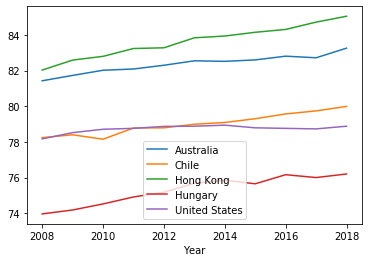

In [56]:
plot = life_ex_country_df.plot.line()

In [57]:
csv1= os.path.join("Resources/GDPbillions.csv")
new_df=pd.read_csv(csv1)
gdp_df=new_df.set_index('Country')
gdp_df


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,
Australia,1055.64,928.63,1148.61,1398.41,1546.89,1576.38,1467.55,1350.62,1206.54,1326.52,1428.29
Chile,179.66,171.41,217.11,251.22,267.18,277.24,259.41,242.50,249.30,276.36,295.40
Hong Kong,219.28,214.05,228.64,248.51,262.63,275.70,291.46,309.38,320.86,341.27,361.73
Hungary,158.33,131.07,132.18,141.94,128.81,135.68,141.03,125.17,128.61,143.11,160.56
United States,14769.86,14478.06,15048.96,15599.73,16253.97,16843.19,17550.68,18206.02,18695.11,19477.34,20533.06


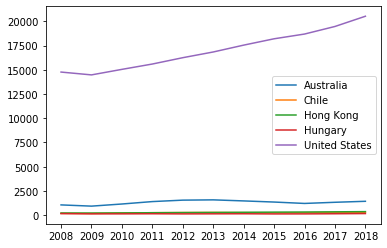

<Figure size 432x288 with 0 Axes>

In [58]:
for index, row in gdp_df.iterrows():
    plt.plot(row, label=index)
    plt.legend()
plt.xlabel=("Years")
plt.ylabel=('GDP in $Billions')
plt.show()
plt.tight_layout()

In [59]:
yr2008 = life_df2[(life_df2["Year"] == 2008)]
yr2009 = life_df2[(life_df2["Year"] == 2009)]
yr2010 = life_df2[(life_df2["Year"] == 2010)]
yr2011 = life_df2[(life_df2["Year"] == 2011)]
yr2012 = life_df2[(life_df2["Year"] == 2012)]
yr2013 = life_df2[(life_df2["Year"] == 2013)]
yr2014 = life_df2[(life_df2["Year"] == 2014)]
yr2015 = life_df2[(life_df2["Year"] == 2015)]
yr2016 = life_df2[(life_df2["Year"] == 2016)]
yr2017 = life_df2[(life_df2["Year"] == 2017)]
yr2018 = life_df2[(life_df2["Year"] == 2018)]

lfe_yr08 = yr2008.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr09 = yr2009.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr10 = yr2010.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr11 = yr2011.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr12 = yr2012.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr13 = yr2013.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr14 = yr2014.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr15 = yr2015.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr16 = yr2016.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr17 = yr2017.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr18 = yr2018.groupby(["Country"]).first(numeric_only=True)["Total"]

life_ex_year_df = pd.DataFrame({"2008": lfe_yr08,
    "2009": lfe_yr09,
    "2010": lfe_yr10,
    "2011": lfe_yr11,
    "2012": lfe_yr12,
    "2013": lfe_yr13,
    "2014": lfe_yr14,
    "2015": lfe_yr15,
    "2016": lfe_yr16,
    "2017": lfe_yr17,
    "2018": lfe_yr18
   })

life_ex_year_df = life_ex_year_df.drop("United States", axis = 0, inplace= False)
life_ex_year_df

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,
Australia,81.43,81.73,82.02,82.09,82.30,82.55,82.52,82.60,82.81,82.72,83.26
Chile,78.24,78.40,78.15,78.78,78.79,78.99,79.09,79.30,79.57,79.74,79.99
Hong Kong,82.03,82.59,82.80,83.24,83.28,83.84,83.94,84.15,84.31,84.72,85.05
Hungary,73.96,74.18,74.52,74.91,75.18,75.68,75.85,75.65,76.16,76.00,76.20
USA,78.17,78.52,78.71,78.76,78.87,78.88,78.94,78.79,78.76,78.73,78.88


In [60]:
Aus_x = life_ex_year_df.loc["Australia"]
Aus_y = gdp_df.loc["Australia"]
Chil_x = life_ex_year_df.loc["Chile"]
Chil_y = gdp_df.loc["Chile"]
HngKng_x = life_ex_year_df.loc["Hong Kong"]
HngKng_y = gdp_df.loc["Hong Kong"]
Hun_x = life_ex_year_df.loc["Hungary"]
Hun_y = gdp_df.loc["Hungary"]
USA_x = life_ex_year_df.loc["USA"]
USA_y = gdp_df.loc["United States"]

The r value of Australlia's GDP vs. Life Expectancy is 0.6


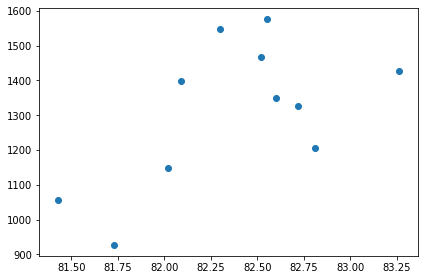

In [61]:
Aus_scat = plt.scatter(Aus_x, Aus_y, marker = 'o')
correlation = st.pearsonr(Aus_x, Aus_y)
plt.xlabel='Life Expectancy Years'
plt.ylabel='GDP in $Billions'
plt.tight_layout()
print(f"The r value of Australlia's GDP vs. Life Expectancy is {round(correlation[0],2)}")

The r value of Chile's GDP vs. Life Expectancy is 0.77


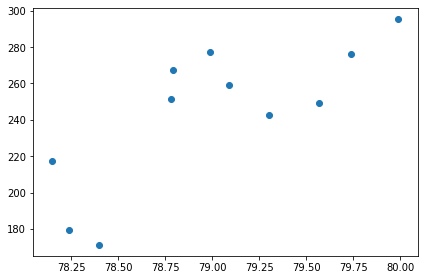

In [62]:
Chil_scat = plt.scatter(Chil_x, Chil_y, marker = 'o' )
correlation = st.pearsonr(Chil_x, Chil_y)
plt.xlabel= 'Life Expectancy Years'
plt.ylabel= 'GDP in $Billions'
plt.tight_layout()
print(f"The r value of Chile's GDP vs. Life Expectancy is {round(correlation[0],2)}")

The r value of Hong Kong's GDP vs. Life Expectancy is 0.98


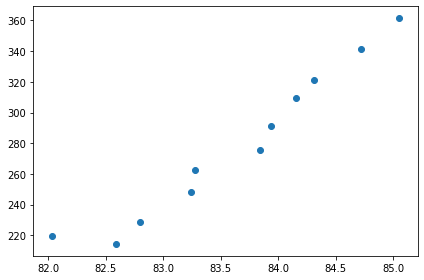

In [63]:
HngKng_scat = plt.scatter(HngKng_x, HngKng_y, marker = 'o')
correlation = st.pearsonr(HngKng_x, HngKng_y)
plt.xlabel = 'Life Expectancy Years'
plt.ylabe = 'GDP in $Billions'
plt.tight_layout()
print(f"The r value of Hong Kong's GDP vs. Life Expectancy is {round(correlation[0],2)}")

The r value of Hungary's GDP vs. Life Expectancy is -0.03


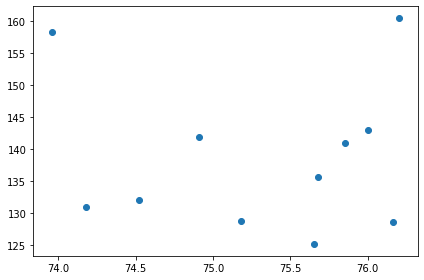

In [64]:
Hun_scat = plt.scatter(Hun_x, Hun_y, marker = 'o')
correlation = st.pearsonr(Hun_x, Hun_y)
plt.xlabel= 'Life Expectancy Years'
plt.ylabel= 'GDP in $Billions'
plt.tight_layout()
print(f"The r value of Hungary's GDP vs. Life Expectancy is {round(correlation[0],2)}")

The r value of United States' GDP vs. Life Expectancy is 0.55


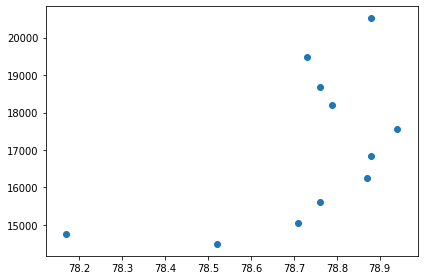

In [65]:
USA_scat= plt.scatter(USA_x, USA_y, marker = 'o')
correlation = st.pearsonr(USA_x, USA_y)
plt.xlabel = 'Life Expectancy Years'
plt.ylabel = 'GDP in $Billions'
plt.tight_layout()
print(f"The r value of United States' GDP vs. Life Expectancy is {round(correlation[0],2)}")

### Create a map that displays a point for every country 

In [66]:
# Initialize Nominatim API
geolocator = Nominatim(user_agent="Data_Cleaning")

# Create a dictionary containing coordinates
coordinates = {
    "City": ["Sydney", "Santiago", "Hong Kong", "Budapeste", "Washington DC"],
    "Country": ["Australia", "Chile", "Hong Kong", "Hungary", "United States"],
}

# Create a Pandas DataFrame containing coordinates
coordinates_df = pd.DataFrame(coordinates)
coordinates_df["Latitude"]= ""
coordinates_df["Longitude"]= ""
for index, c in coordinates_df.iterrows():
    city = c["City"]
    country = c["Country"]
    location = geolocator.geocode(f"{city},{country}")
    c["Latitude"] = location.latitude
    c["Longitude"] = location.longitude

# Display sample data
coordinates_df

,City,Country,Latitude,Longitude
0,Sydney,Australia,-33.8698,151.208
1,Santiago,Chile,-33.4378,-70.6505
2,Hong Kong,Hong Kong,22.2793,114.163
3,Budapeste,Hungary,47.498,19.0404
4,Washington DC,United States,38.895,-77.0365


In [67]:
%%capture --no-display

# Configure the map plot_1
map_plot_1 = coordinates_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    scale = 0.5,
    color = "Country"
)

# Display the map plot
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country)

### Add the 2018 - GDP and Life Expectancy in the hover message for country

In [68]:
# Merge coordinates_df + life_ex_country_df + gdp_df and create an new df file only 2018
gdp_2018 = gdp_df["2018"]
life_expectancy_2018 = df.loc[df["Year"]== 2018, ["Country", "Year", "Female", "Male", "Total"]]

temp_df = coordinates_df.merge(gdp_2018,on=["Country"])
all_data_2018_df = temp_df.merge(life_expectancy_2018,on=["Country"])
all_data_2018_df.rename(columns={"2018": "GDP 2018 (Billions)", "Total": "Life Expectancy"}, inplace=True)
all_data_2018_df.drop(columns=["City","Female","Male"], inplace=True)

all_data_2018_df


,Country,Latitude,Longitude,GDP 2018 (Billions),Year,Life Expectancy
0,Australia,-33.8698,151.208,1428.29,2018.0,83.26
1,Chile,-33.4378,-70.6505,295.40,2018.0,79.99
2,Hong Kong,22.2793,114.163,361.73,2018.0,85.05
3,Hungary,47.498,19.0404,160.56,2018.0,76.20
4,United States,38.895,-77.0365,20533.06,2018.0,78.88


In [69]:
%%capture --no-display

# Configure the map plot_1
map_plot_2 = all_data_2018_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    scale = 0.5,
    hover_cols = ["Life Expectancy", "GDP 2018 (Billions)"],
    color = "Country"
)

# Display the map plot
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country,Life Expectancy,GDP 2018 (Billions))